# Tracer Example

This notebook shows us how we can trace and visualize a `ttnn` tensor through series of operations on it. 

If we want to use tracing, we have to configure the `TTNN_CONFIG_OVERRIDES` environment variable. We want to set the `enable_fast_runtime_mode` property value to `false`;

In [ ]:
import os
os.environ["TTNN_CONFIG_OVERRIDES"] = "{\"enable_fast_runtime_mode\": false}"

Import the required libraries. To trace, we nee to import `trace` and `visualize` from the `ttnn.tracer` module.

In [2]:
import torch
import ttnn
from ttnn.tracer import trace, visualize

2025-05-01 14:45:08.739 | DEBUG    | ttnn:<module>:80 - Loading ttnn configuration overrides from environment variable TTNN_CONFIG_OVERRIDES
2025-05-01 14:45:08.741 | DEBUG    | ttnn:<module>:83 - Initial ttnn.CONFIG:
Config{cache_path=/home/avgdev/.cache/ttnn,model_cache_path=/home/avgdev/.cache/ttnn/models,tmp_dir=/tmp/ttnn,enable_model_cache=false,enable_fast_runtime_mode=false,throw_exception_on_fallback=false,enable_logging=false,enable_graph_report=false,enable_detailed_buffer_report=false,enable_detailed_tensor_report=false,enable_comparison_mode=false,comparison_mode_should_raise_exception=false,comparison_mode_pcc=0.9999,root_report_path=generated/ttnn/reports,report_name=std::nullopt,std::nullopt}


Always wrap the tensors you want to trace within the `with trace():` block.

In [3]:
with trace():
    a = ttnn.from_torch(torch.tensor([[3, 3]]), dtype=ttnn.bfloat16, layout=ttnn.TILE_LAYOUT)
    b = ttnn.from_torch(torch.tensor([[5], [4]]), dtype=ttnn.bfloat16, layout=ttnn.TILE_LAYOUT)

                 Always | INFO     | Begin op: tt::tt_metal::detail::convert_python_tensor_to_tt_tensor
                 Always | INFO     | input any type name ignored: std::__1::reference_wrapper<pybind11::handle const>
                 Always | INFO     | input any type name ignored: std::__1::reference_wrapper<std::__1::optional<tt::tt_metal::DataType>>
                 Always | INFO     | input any type name ignored: std::__1::reference_wrapper<std::__1::optional<tt::tt_metal::Layout>>
                 Always | INFO     | input any type name ignored: std::__1::reference_wrapper<std::__1::optional<tt::tt_metal::Tile> const>
                 Always | INFO     | input any type name ignored: std::__1::reference_wrapper<tt::tt_metal::MemoryConfig const>
                 Always | INFO     | input any type name ignored: std::__1::reference_wrapper<tt::tt_metal::IDevice*>
                 Always | INFO     | input any type name ignored: std::__1::reference_wrapper<bool const>
            

Visualize the flow of your tensors by calling `visualize` with the tensors as input.

2025-05-01 14:46:28.455 | DEBUG    | ttnn.tracer:visualize:443 - Dumping graph of the model to None
2025-05-01 14:46:28.456 | DEBUG    | ttnn.tracer:visualize:443 - Dumping graph of the model to None


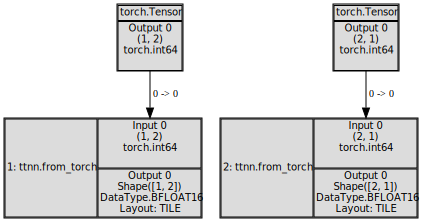

In [7]:
visualize(a)
visualize(b)

Open the device to grab a handle to it.

In [8]:
device_id = 0
device = ttnn.open_device(device_id=device_id)

                 Device | INFO     | Opening user mode device driver
2025-05-01 14:47:45.421 | INFO     | SiliconDriver   - Opened PCI device 0; KMD version: 1.33.0, IOMMU: disabled

2025-05-01 14:47:45.433 | INFO     | SiliconDriver   - Opened PCI device 0; KMD version: 1.33.0, IOMMU: disabled
2025-05-01 14:47:45.435 | INFO     | SiliconDriver   - Harvesting mask for chip 0 is 0x200 (physical layout: 0x1, logical: 0x200, simulated harvesting mask: 0x0).
2025-05-01 14:47:45.437 | INFO     | SiliconDriver   - Opened PCI device 0; KMD version: 1.33.0, IOMMU: disabled
2025-05-01 14:47:45.437 | INFO     | SiliconDriver   - Detected PCI devices: [0]
2025-05-01 14:47:45.437 | INFO     | SiliconDriver   - Using local chip ids: {0} and remote chip ids {}
2025-05-01 14:47:45.557 | INFO     | SiliconDriver   - Software version 6.0.0, Ethernet FW version 6.14.0 (Device 0)
                  Metal | INFO     | Initializing device 0. Program cache is NOT enabled
                  Metal | INFO     | 

New chip! We now have 1 chips
Chip initialization complete (found )
Chip initializing complete...
 ARC

 [4/4] DRAM

 [16/16] ETH

 CPU

Chip detection complete (found )


Send the tensors to the device, so that we can perform the `ttnn.matmul` operation.

In [9]:
with trace():
    a = ttnn.to_device(a, device)
    b = ttnn.to_device(b, device)

                 Always | INFO     | Begin op: Tensor::to_device
                 Always | INFO     | Tensor doesn't have buffer, but storage is tt::tt_metal::OwnedStorage
                 Always | INFO     | input any type name ignored: std::__1::reference_wrapper<tt::tt_metal::IDevice*>
                 Always | INFO     | input any type name ignored: std::__1::reference_wrapper<tt::tt_metal::MemoryConfig const>
                 Always | INFO     | End op: Tensor::to_device
                 Always | INFO     | Begin op: Tensor::to_device
                 Always | INFO     | Tensor doesn't have buffer, but storage is tt::tt_metal::OwnedStorage
                 Always | INFO     | input any type name ignored: std::__1::reference_wrapper<tt::tt_metal::IDevice*>
                 Always | INFO     | input any type name ignored: std::__1::reference_wrapper<tt::tt_metal::MemoryConfig const>
                 Always | INFO     | End op: Tensor::to_device


2025-05-01 14:48:49.008 | DEBUG    | ttnn.tracer:visualize:443 - Dumping graph of the model to None
2025-05-01 14:48:49.010 | DEBUG    | ttnn.tracer:visualize:443 - Dumping graph of the model to None


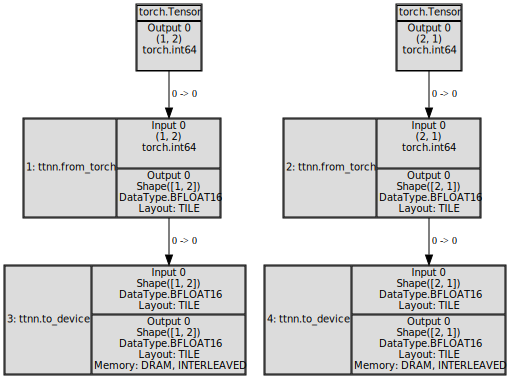

In [10]:
visualize(a)
visualize(b)

Perform `ttnn.matmul`.

In [11]:
with trace():
    c = ttnn.matmul(a, b)

                 Always | INFO     | Begin op: ttnn::matmul
                 Always | INFO     | input any type name ignored: std::__1::reference_wrapper<bool const>
                 Always | INFO     | input any type name ignored: std::__1::reference_wrapper<bool const>
                 Always | INFO     | input any type name ignored: std::__1::reference_wrapper<std::__1::optional<tt::tt_metal::MemoryConfig const> const>
                 Always | INFO     | input any type name ignored: std::__1::reference_wrapper<std::__1::optional<tt::tt_metal::DataType const> const>
                 Always | INFO     | input any type name ignored: std::__1::reference_wrapper<std::__1::optional<std::__1::variant<ttnn::operations::matmul::MatmulMultiCoreProgramConfig, ttnn::operations::matmul::MatmulMultiCoreNonOptimizedReuseProgramConfig, ttnn::operations::matmul::MatmulMultiCoreReuseProgramConfig, ttnn::operations::matmul::MatmulMultiCoreReuseMultiCastProgramConfig, ttnn::operations::matmul::MatmulM

Visualize the results.

2025-05-01 14:50:43.493 | DEBUG    | ttnn.tracer:visualize:443 - Dumping graph of the model to None


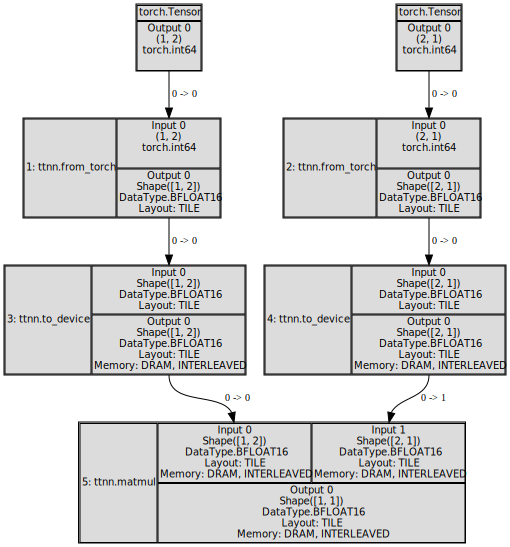

In [12]:
visualize(c)

In [13]:
c

ttnn.Tensor([[27.00000]], shape=Shape([1, 1]), dtype=DataType::BFLOAT16, layout=Layout::TILE)

Send the resulting tensor from `ttnn.matmul` back to CPU memory.

In [14]:
with trace():
    c = ttnn.from_device(c)

                 Always | INFO     | Begin op: Tensor::cpu
                 Always | INFO     | input any type name ignored: std::__1::reference_wrapper<bool>
                 Always | INFO     | End op: Tensor::cpu
                 Always | INFO     | Tensor doesn't have buffer, but storage is tt::tt_metal::OwnedStorage


Visualize the entire flow of the `ttnn.matmul` result:

2025-05-01 14:56:41.718 | DEBUG    | ttnn.tracer:visualize:443 - Dumping graph of the model to None


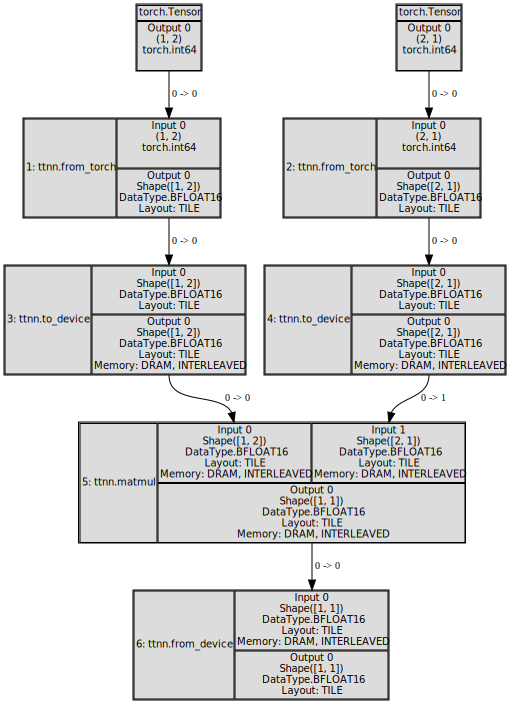

In [17]:
visualize(c)

Close the device to clean up. :)

In [16]:
ttnn.close_device(device)

                  Metal | INFO     | Closing device 0
                  Metal | INFO     | Disabling and clearing program cache on device 0
